# Neural Networks: MNIST Handwritten Digit Classification 

## Step 1: Load Data

We'll be using the pre-labeled [**MNIST dataset**](https://en.wikipedia.org/wiki/MNIST_database), which contains 70,000 grayscale images of handwritten digits, along with their corresponding digit labels. 

Since we want our model to be able to perform well in the real world on **previously unseen data**, we'll only train it on 60,000 images, and then evaluate our model on the remaining 10,000.

In [3]:
# Giving Colab access to the drive like last time...we have to do this every time since we're using Colab
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/CaisLessons/3: Neural Networks

# Import MNIST Dataset from Keras

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/CaisLessons/3: Neural Networks


In [12]:
# Data Exploration (TODO: fill in the blanks)
# How many training and testing examples?
print("Number of training examples:", len(X_train))
print("Number of testing examples:", len(X_test))

# What features are given for each example?
print("Shape of one example: " + str(X_train[1].shape)) 

# What do our labels look like?
print("Labels: ", y_train)

Number of training examples: 60000
Number of testing examples: 10000
Shape of one example: (28, 28)
Labels:  [5 0 4 ... 5 6 8]


9


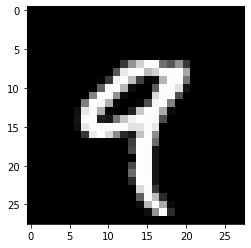

In [14]:
# Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Change this number and re-run the cell to see different image samples!
sample_num = 4

plt.imshow(X_train[sample_num], cmap=plt.get_cmap('gray'))
print(y_train[sample_num])
plt.show()

## Step 2: Data Preprocessing

* **Flatten** the 28 x 28 2D images into 784-dimensional column vectors. Each pixel will then correspond to one neuron in the 784-dimensional input layer of our neural network.
* **Normalize** the pixel values from 0-255 to 0-1. We can do this by simply dividing each of the 0-255 greyscale values by 255. Neural networks typically like to work with smaller values, so this normalization is a pretty common first step in most deep learning tasks.
* **Categorize** the outputs into 10-dimensional "one-hot" vectors. The MNIST dataset originally contains actual numerical labels for each image (e.g. 1, 2, ...), but remember that our neural network outputs 10 distinct values (one for each digit) -- not just the digit number itself. We want our training labels to match up with our neural network output. These categorized vectors contain all 0's, except a 1 in the location indicating which digit the image corresponds to.

In [15]:
# Flatten 28*28 images to a 784 vector for each image

num_pixels = X_train.shape[1] * X_train.shape[2] # 28 * 28 = 784
X_train_flattened = X_train.reshape(X_train.shape[0], num_pixels).astype('float32') # new shape: 60,000 x 784
X_test_flattened = X_test.reshape(X_test.shape[0], num_pixels).astype('float32') # new shape: 10,000 x 784

In [18]:
# TODO Normalize pixel values for both train and test sets to between 0-1 (2 lines). Remember, pixel values come within [0,255]
X_train_flattened /= 255
X_test_flattened /= 255


In [25]:
# Categorize the outputs ("one-hot" vectors)    (TODO: 2 lines, fill in the blanks)
import tensorflow as tf
from tensorflow.keras.utils import to_categorical   # <----- hint: use this 

# "one-hot" encode the training set labels
y_train_categorical = to_categorical(y_train, num_classes = 10)
# "one-hot" encode the test set labels
y_test_categorical = to_categorical(y_test, num_classes = 10)

# What does the first label look like before and after one-hot encoding?
print(y_train[0], y_train_categorical[0])

5 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Step 3: Create Neural Network Model

1. **Initialize** the network, add desired layers. The settings we decide to use, e.g. number of layers, number of neurons per layer, are called **hyperparameters**, and have to be tuned by hand, rather than learned via gradient descent.
2. **Compile** the network to get ready for training. This tells the network what cost/loss function to use ("cost" and "loss" are used interchangeably), and what type of gradient descent to use.
3. **Training** the network, using the training images. This actually feeds the training data into the network, and uses gradient descent and backpropagation to adjust the network's weights in order to minimize the cost function.

**Workshop [Slides](https://docs.google.com/presentation/d/1BIn3bbdcMxGYzttXZsx82L0tMlyDLFLcMVEjn5o-yyk/edit?usp=sharing)**

**Keras Resources**:
* [Getting Started](https://keras.io/) 
* Sequential Model [Overview](https://keras.io/getting-started/sequential-model-guide/)
* Sequential Model [Documentation](https://keras.io/models/sequential/) 
* [Core Layers](https://keras.io/layers/core/) 
* [Activation Functions](https://keras.io/activations/)
* [Cost/Loss Functions](https://keras.io/losses)
* [Optimizers](https://keras.io/optimizers) 



In [36]:
# 1 -- Network Initialization (TODO 3 lines)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize a simple 'blank-slate' sequential neural network model
model = Sequential() 

# TODO Add hidden layer 1: __ neurons (up to you), 'relu' activation 
model.add(Dense(units = 128, activation = 'relu', input_dim = 784))
# TODO Add hidden layer 2: __ neurons (up to you), 'relu' activation
model.add(Dense(units = 64, activation = 'relu'))
# TODO Add output layer: ? neurons (one for each class), 'softmax' activation
model.add(Dense(units = 10, activation = 'softmax'))

# Print a summary of what you just created
model.summary() 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [41]:
# 2 -- Network Compilation (TODO 1 line)

# TODO Compile. Loss function: categorical crossentropy. Optimizer: stochastic gradient descent (SGD). Metrics: 'accuracy'
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])


In [42]:
# 3 -- Network Training (TODO 1 line)

# TODO Fit the model to the data. Number of epochs: ___ (up to you). Batch size: ___ (up to you, conventionally a power of 2)
model.fit(X_train_flattened, y_train_categorical, epochs = 5, batch_size = 32)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6154 - accuracy: 0.8346
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2905 - accuracy: 0.9171
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2402 - accuracy: 0.9309
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2069 - accuracy: 0.9413
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1826 - accuracy: 0.9478


## Step 4: Evaluation & Predictions

In [44]:
# 4 -- Evaluate on the test data! (TODO 1 line + fill in 2 print statements)

# TODO Evaluate the model on the test set and 
#      store the results (loss and metrics) into a variable. Batch size: ___ (up to you, conventionally a power of 2)
loss_and_metrics = model.evaluate(X_test_flattened, y_test_categorical, batch_size = 128)

# TODO Print your variable (which will be an array, since it contains both loss [0] and metrics [1])
print("Final test cost/loss: ", loss_and_metrics[0])
print("Final test accuracy: ",  loss_and_metrics[1])


79/79 [==============================] - 0s 2ms/step - loss: 0.1702 - accuracy: 0.9507
Final test cost/loss:  0.1702108085155487
Final test accuracy:  0.9506999850273132


**Final Sanity Check:** Make sure the our neural network's predictions match up with the actual images

Output vector:  [1.15588286e-04 4.22381788e-07 1.77498814e-03 5.26629062e-03
 1.05564538e-07 1.08427026e-04 5.67536684e-09 9.92511749e-01
 5.55724764e-05 1.66871963e-04]
Predicted digit:  7


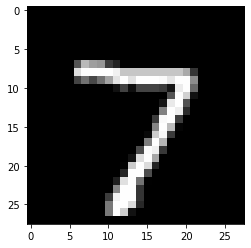

In [45]:
# Pick a random test sample and see what the model predicts! 
sample_num = 0 

import numpy as np

test_sample = np.expand_dims(X_test_flattened[sample_num], axis=0) # pick out a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print("Output vector: ", predicted_scores[0]) # print predicted scores

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print("Predicted digit: ", predicted_class) # print predicted classification

# Show actual input image
plt.imshow(X_test[sample_num], cmap=plt.get_cmap('gray'))
plt.show()

## Congrats! You just did deep learning!

### Additional Resources:
* CAIS++ [Blog](http://caisplusplus.usc.edu/blog/curriculum/lesson4) Posts 
* [3Blue1Brown](https://www.youtube.com/watch?v=aircAruvnKk) Videos 
* ML Cheatsheet for [Activation Functions](http://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) 
* ML Cheatsheet for [Cost/Loss Functions](http://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
* Michael Nielsen [Free Online Book](http://neuralnetworksanddeeplearning.com) 